In [1]:
# Importing required Librabries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='swT3AGaBeuHxhyFeVLWbnOsKNtOFUTcCgCSd0dS_dG7a',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'liverdiseaseprediction-donotdelete-pr-qrmai7j7eyoxzg'
object_key = 'indian_liver_patient.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.shape

(583, 11)

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Handling Duplicate and Null Values

In [8]:
# Checking for null values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
# Checking for duplicated rows
df.duplicated().sum()

13

In [10]:
df[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [11]:
# Removing duplicated rows
df=df.drop_duplicates()

In [12]:
df.shape

(570, 11)

In [13]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [14]:
# Rows containing null values
df[df['Albumin_and_Globulin_Ratio'].isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


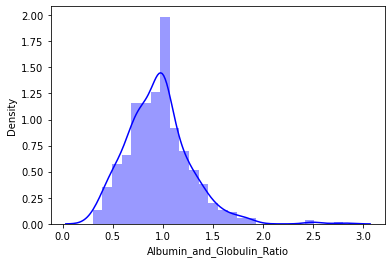

In [15]:
sns.distplot(df.Albumin_and_Globulin_Ratio,color='blue')
plt.show()

In [16]:
df["Albumin_and_Globulin_Ratio"].median()

0.95

In [17]:
# Replacing null values with the median
df['Albumin_and_Globulin_Ratio']=df["Albumin_and_Globulin_Ratio"].fillna(df['Albumin_and_Globulin_Ratio'].median())

/tmp/wsuser/ipykernel_164/3573788363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Albumin_and_Globulin_Ratio']=df["Albumin_and_Globulin_Ratio"].fillna(df['Albumin_and_Globulin_Ratio'].median())


In [18]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Data Visulaization

## Uni-Variate Analysis

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


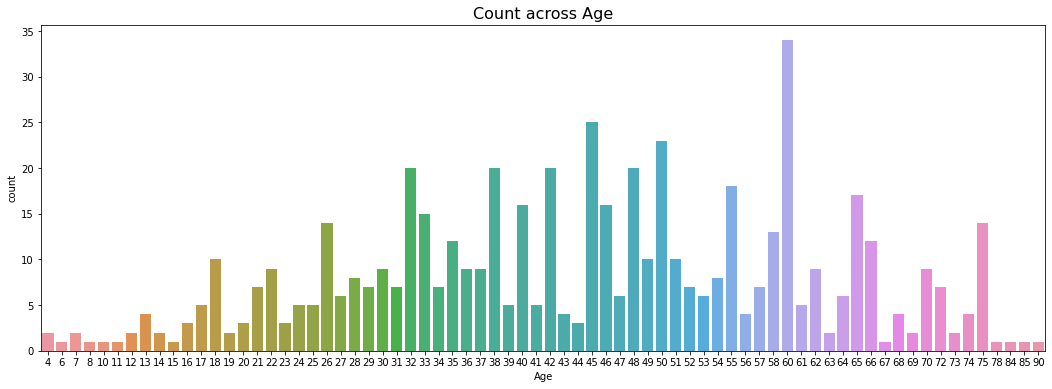

In [19]:
# Analyzing Age of the Patients
plt.figure(figsize = (18,6))
sns.countplot(df['Age'])
plt.title('Count across Age',fontsize=16)
plt.show()

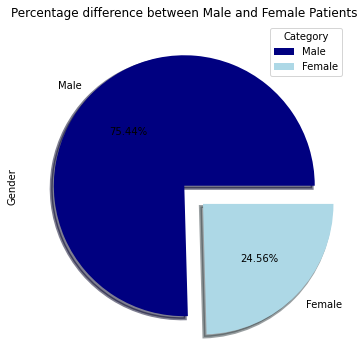

In [20]:
# Analyzing Gender
plt.figure(figsize=(9,6))
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['navy','lightblue'],explode=(0,0.2),shadow=True,wedgeprops = {'linewidth': 3})
label=['Male','Female']
plt.title('Percentage difference between Male and Female Patients')
plt.legend(label,title='Category')
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


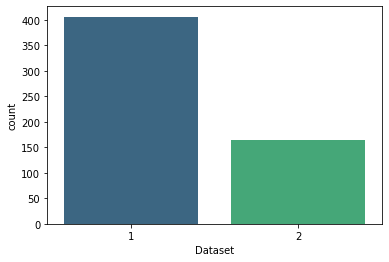

In [21]:
# Analyzing Dataset(target Variable)
sns.countplot(df.Dataset,palette='viridis')
plt.show()

# Multivariate Analysis

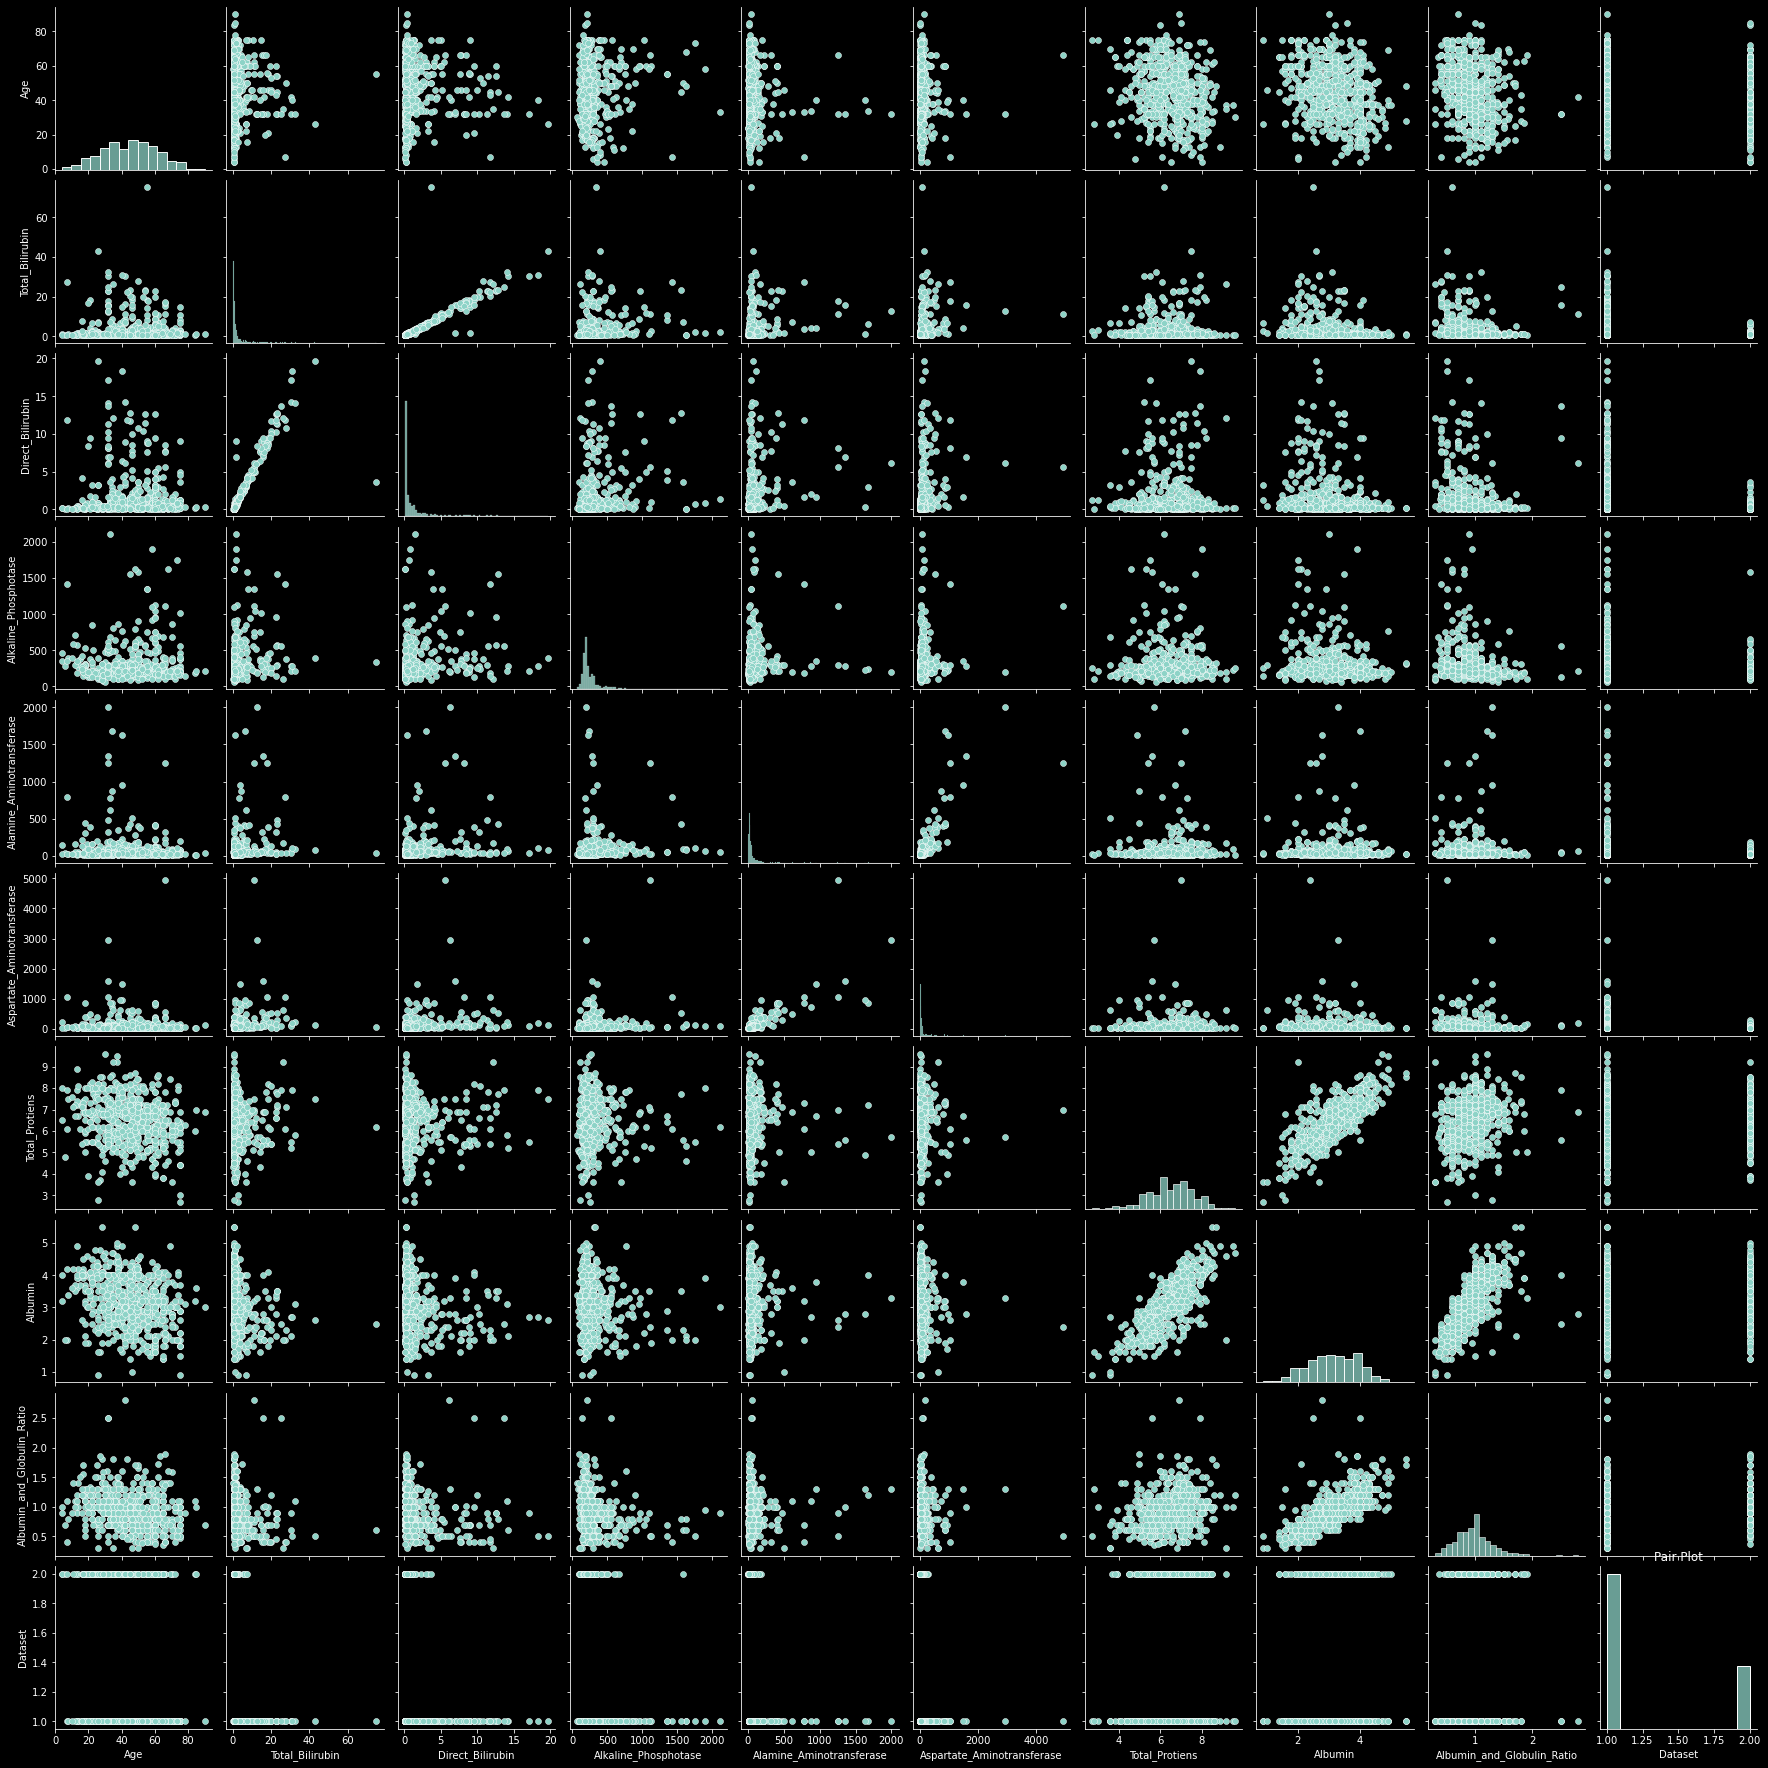

In [22]:
plt.style.use("dark_background")
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

In [23]:
numerical_data=df[['Total_Bilirubin','Direct_Bilirubin','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

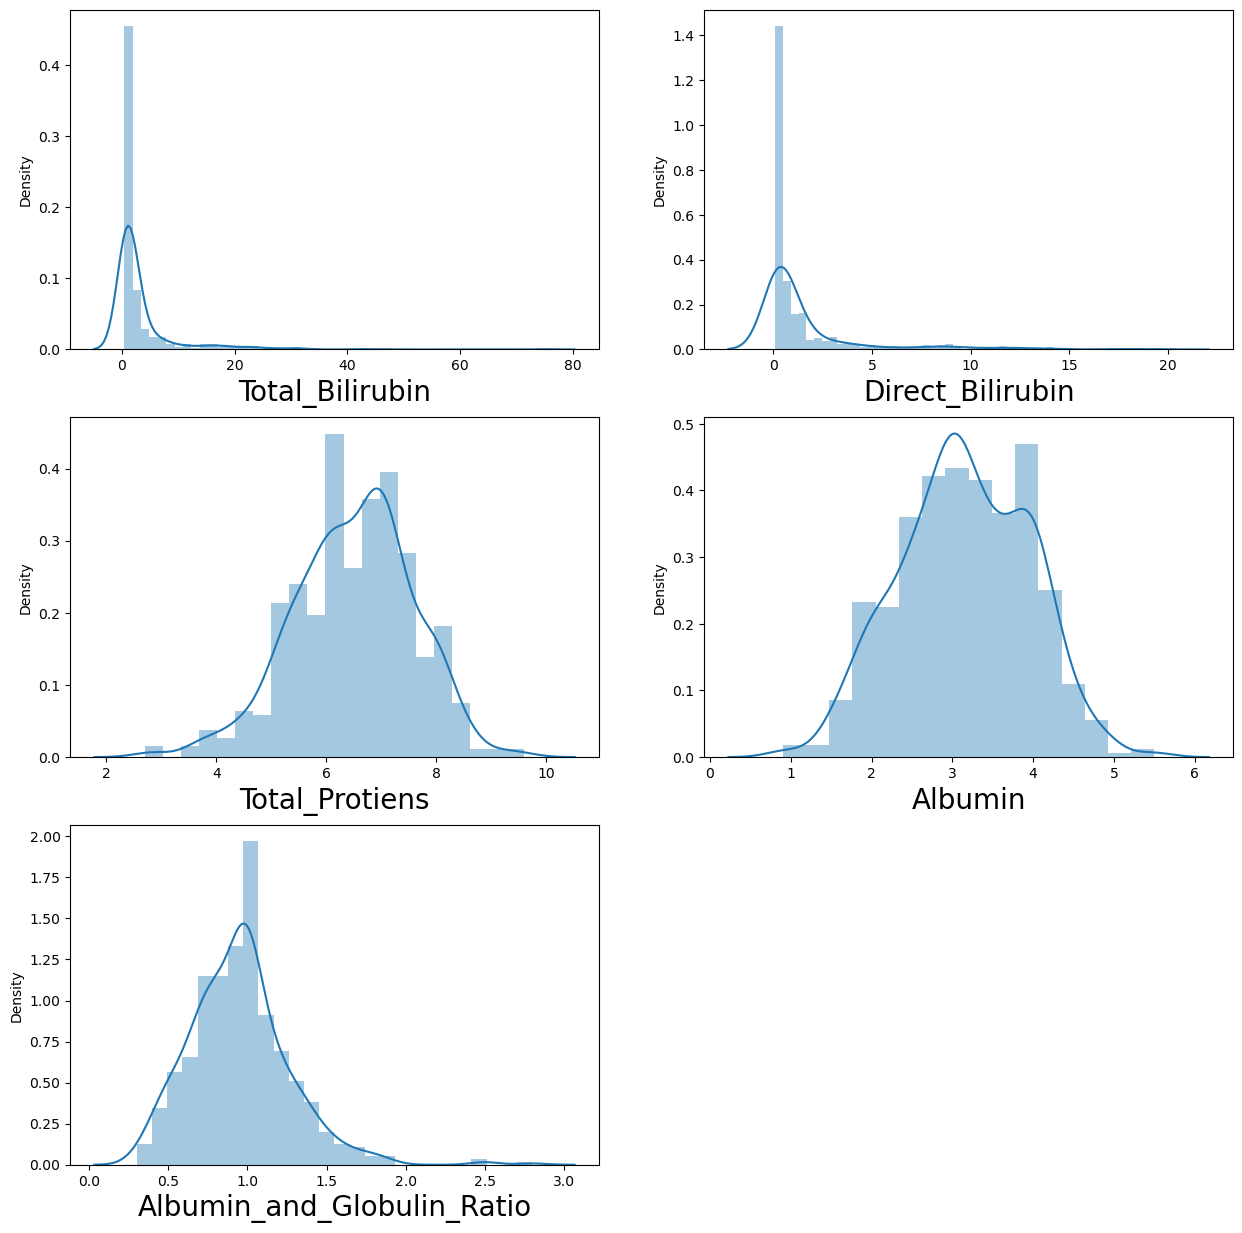

In [24]:
plt.style.use("default")
plt.figure(figsize=(15,15))
plotnumber=1

for column in numerical_data:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(x=numerical_data[column],color='tab:blue')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

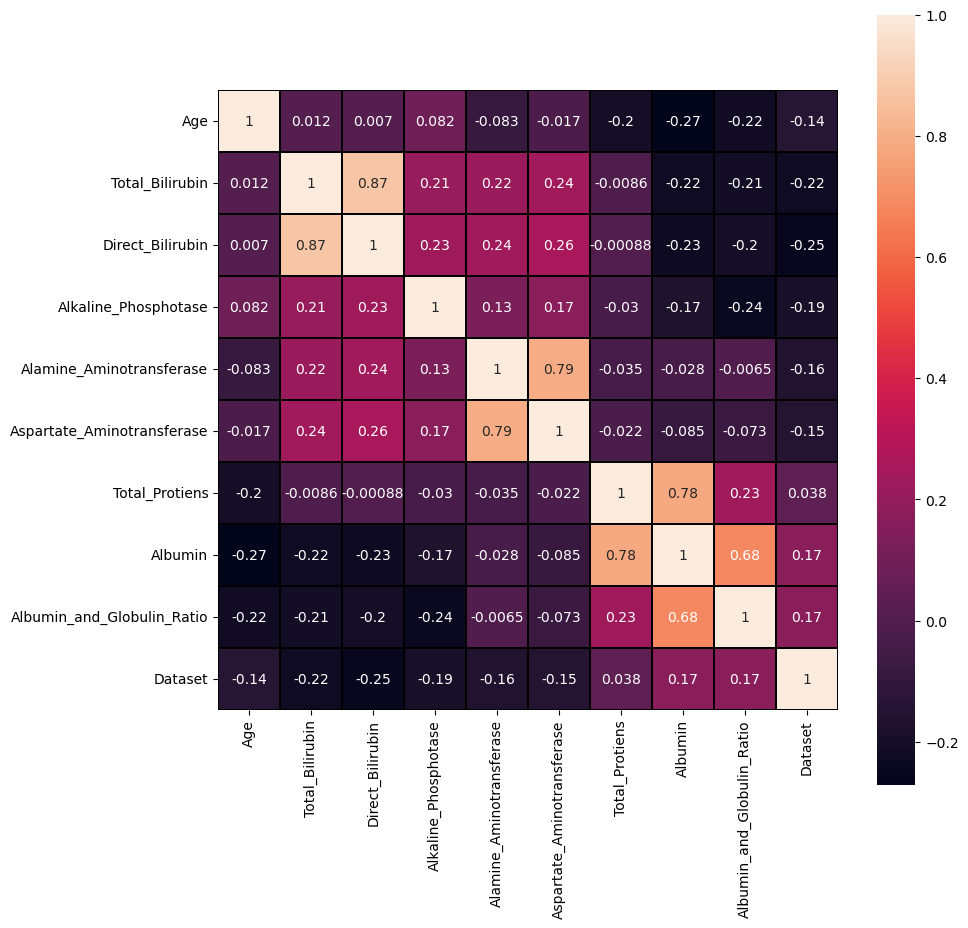

In [25]:
#plotting a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,linewidths=0.25,vmax=1.0, linecolor='black',square=True)
plt.show()

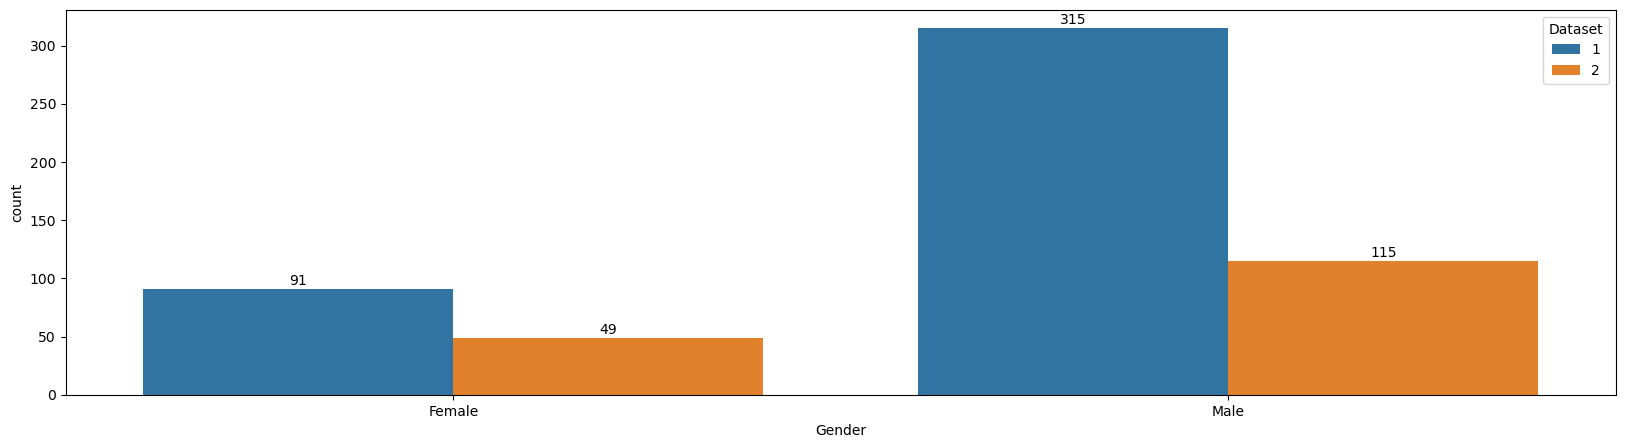

In [26]:
# Analysing Gender and  Dataset

plt.figure(figsize=(20,5))
b=sns.countplot(x=df['Gender'],hue=df['Dataset'])
for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

# Outliers

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

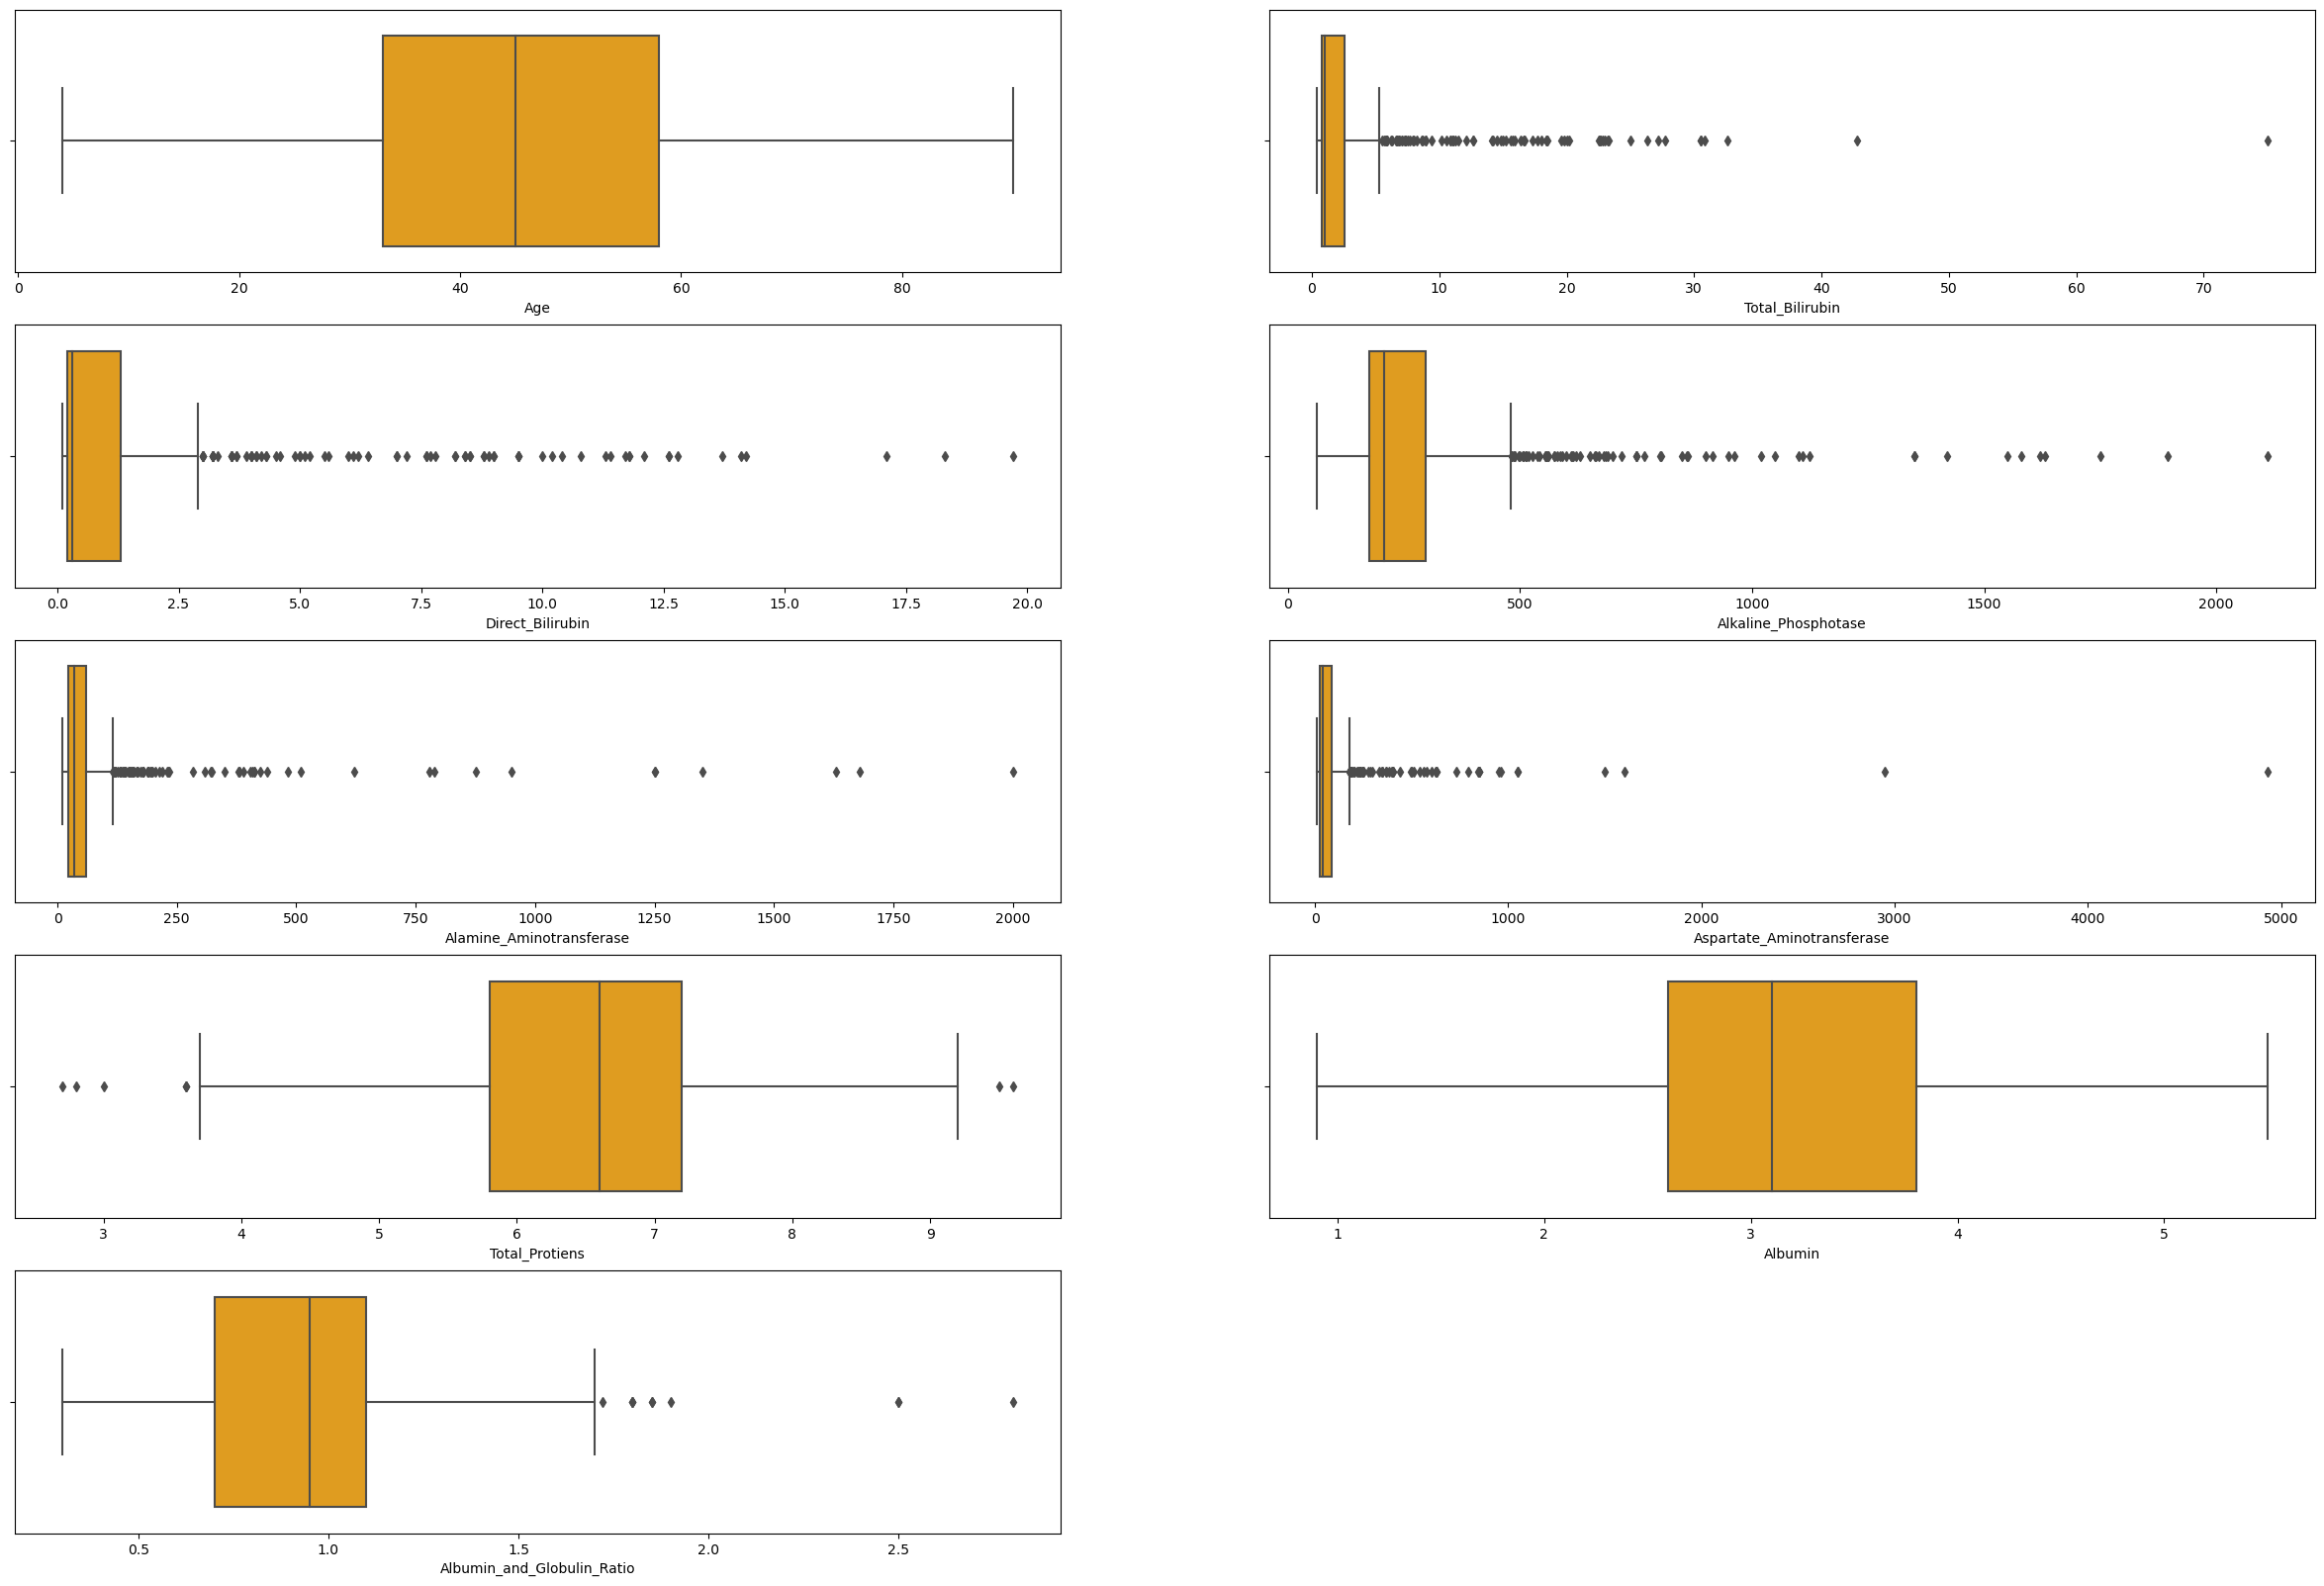

In [27]:
#Checking for outliers
cfo=df.drop(['Gender','Dataset'],axis=1)
plt.figure(figsize=(30,20),facecolor='white')
plotnumber=1
for c in cfo:
    ax=plt.subplot(5,2,plotnumber)
    sns.boxplot(cfo[c],color='orange')
    plotnumber=plotnumber + 1 
plt.show()

## Changing Categorical data to Numerical data

In [28]:
df.Gender.value_counts()

Male      430
Female    140
Name: Gender, dtype: int64

In [29]:
df.Gender=df.Gender.map({'Male':0,'Female':1})

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Dependent and Independent Variables

In [30]:

x=df.drop(['Dataset'],axis=1)
y=df['Dataset']

### Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

In [32]:
scaled_x

array([[0.70930233, 1.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 0.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 0.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 0.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 0.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 0.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

In [33]:
x=scaled_x

#### Splitting data into train and test

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=2)

# Model Building

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()     
log_reg.fit(x_train,y_train)

LogisticRegression()

In [36]:
pred_lr=log_reg.predict(x_test)
pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2])

In [37]:
y_test

542    2
304    1
480    2
115    2
353    1
      ..
484    1
462    1
25     1
41     2
243    1
Name: Dataset, Length: 114, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [39]:
Accuracy_train_log=accuracy_score(y_test,pred_lr)
Accuracy_train_log

0.7017543859649122

In [40]:

report_test_log=classification_report(y_test, pred_lr)
print(report_test_log)

              precision    recall  f1-score   support

           1       0.71      0.99      0.82        80
           2       0.50      0.03      0.06        34

    accuracy                           0.70       114
   macro avg       0.60      0.51      0.44       114
weighted avg       0.64      0.70      0.59       114



In [41]:
x_train_pred_log=log_reg.predict(x_train)

In [42]:
Accuracy_train_lr=accuracy_score(y_train,x_train_pred_log)

In [43]:
Accuracy_train_lr

0.7192982456140351

In [44]:
confusion_matrix(y_test,pred_lr)

array([[79,  1],
       [33,  1]])

## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [46]:
x_train_predict=rfc.predict(x_train)

In [47]:
x_test_predict=rfc.predict(x_test)

In [48]:
RandomForestClassifierScore = rfc.score(x_train,y_train)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)
RandomForestClassifierScore = rfc.score(x_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 100.0
Accuracy obtained by Random Forest Classifier model: 72.80701754385966


In [49]:
report=classification_report(y_train,x_train_predict)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       326
           2       1.00      1.00      1.00       130

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



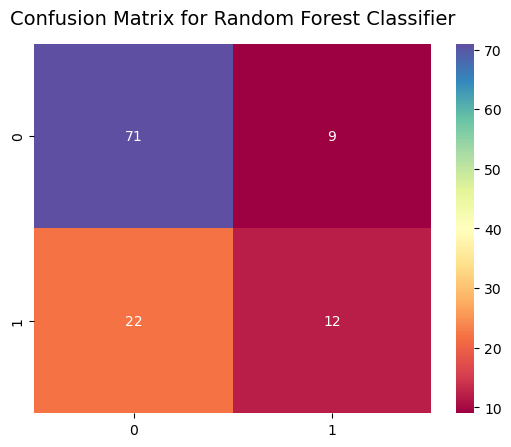

In [50]:
y_pred_rfc = rfc.predict(x_test)
cf_matrix = confusion_matrix(y_test, x_test_predict)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14,y=1.03);

## KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
x_train_pred_KNN=KNN.predict(x_train)
x_train_pred_KNN

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,

In [53]:
pred_KNN=KNN.predict(x_test)
pred_KNN

array([2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1])

In [54]:
KNeighborsClassifierScore = KNN.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 71.05263157894737


In [55]:
Accuracy_test_knn=accuracy_score(y_test,pred_KNN)

In [56]:
Accuracy_test_knn

0.7105263157894737

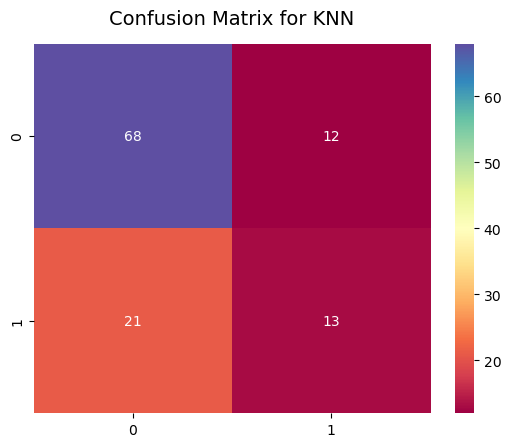

In [57]:

cf_matrix = confusion_matrix(y_test, pred_KNN)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for KNN", fontsize=14,y=1.03);

## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
x_test_pred_DT=DT.predict(x_test)
x_test_pred_DT

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1])

In [60]:
Accuracy_test_DT=accuracy_score(y_test,x_test_pred_DT)
Accuracy_test_DT

0.631578947368421

In [61]:
report_test_DT=classification_report(y_test, x_test_pred_DT)#
print(report_test_DT)

              precision    recall  f1-score   support

           1       0.74      0.72      0.73        80
           2       0.39      0.41      0.40        34

    accuracy                           0.63       114
   macro avg       0.57      0.57      0.57       114
weighted avg       0.64      0.63      0.63       114



In [62]:
print('Testing score for DT regression is',DT.score(x_test,y_test))

Testing score for DT regression is 0.631578947368421


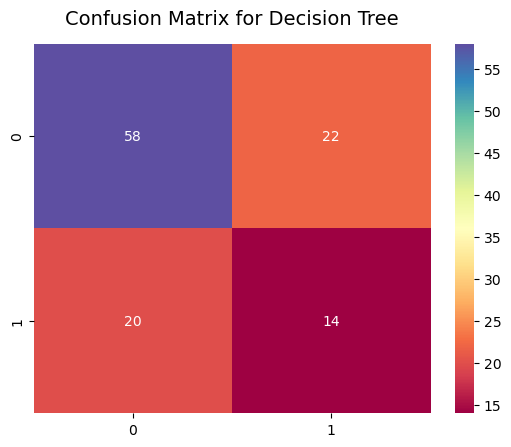

In [63]:
cf_matrix = confusion_matrix(y_test, x_test_pred_DT)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Decision Tree", fontsize=14,y=1.03);

## Support Vector Machine

In [64]:
from sklearn.svm import SVC  
svclassifier = SVC() 
svclassifier.fit(x_train, y_train)

SVC()

In [65]:
x_test_predict=svclassifier.predict(x_test)

In [66]:
report=classification_report(y_test,x_test_predict) 
print(report)

              precision    recall  f1-score   support

           1       0.70      1.00      0.82        80
           2       0.00      0.00      0.00        34

    accuracy                           0.70       114
   macro avg       0.35      0.50      0.41       114
weighted avg       0.49      0.70      0.58       114



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
import sklearn
sklearn.__version__

'1.0.2'

# IBM Deployment

In [68]:
!pip install -U ibm-watson-machine-learning

In [69]:
from ibm_watson_machine_learning import APIClient
import json

In [70]:
wml_credentials = {
    "apikey":"bdcHCOVI3tUCe4yhhPmXYDEmizXF0RjYxL38GZGn3v6I",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [71]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
7f1e1671-71b8-4090-a403-704f1add62c5  final1  2022-11-06T05:46:28.561Z
------------------------------------  ------  ------------------------


In [72]:
SPACE_ID= "7f1e1671-71b8-4090-a403-704f1add62c5"

In [73]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [74]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [75]:
MODEL_NAME = 'DT'
DEPLOYMENT_NAME = 'DT_prediction'
DEMO_MODEL = DT

In [76]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [77]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [78]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [79]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Dataset',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-11T16:00:04.876Z',
  'id': 'b7052f71-60d7-41be-8054-43cc4756a055',
  'modified_at': '2022-11-11T16:00:08.938Z',
  'name': 'DT',
  'owner': 'IBMid-666002GYX1',
  'resource_key': '89e9ef52-519d-43a5-91ff-489d17952a0b',
  'space_id': '7f1e1671-71b8-4090-a403-704f1add62c5'},
 

In [80]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'b7052f71-60d7-41be-8054-43cc4756a055'

In [81]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [82]:
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'b7052f71-60d7-41be-8054-43cc4756a055' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8216d53f-c157-4b9f-89af-174229f60e03'
------------------------------------------------------------------------------------------------


